# Лабораторная работа №6. Ансамбли моделей машинного обучения.
## Загрузка и предварительный анализ данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, classification_report
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('HR_Data.csv')

## 2. Предобработка данных

In [2]:
# Удаление ненужных столбцов
df = df.drop(['EmpID', 'Over18'], axis=1)

# Заполнение пропусков
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Кодирование целевой переменной для классификации
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

## 3. Подготовка данных для классификации (Attrition)

In [3]:
# Разделение на признаки и целевую переменную
X_class = df.drop('Attrition', axis=1)
y_class = df['Attrition']

# Создание трансформера
numeric_features = X_class.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_class.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
])

# Разделение данных
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Препроцессинг
X_train_class_prep = preprocessor.fit_transform(X_train_class)
X_test_class_prep = preprocessor.transform(X_test_class)

## 4. Модели классификации

### 4.1. Стекинг (Stacking)

In [4]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train_class_prep, y_train_class)
y_pred_stack = stacking_model.predict(X_test_class_prep)

print("Ансамбль моделей Stacking:")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_stack):.2f}")
print("\n" + classification_report(y_test_class, y_pred_stack))

Ансамбль моделей Stacking:
Accuracy: 0.89

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       248
           1       0.81      0.45      0.58        47

    accuracy                           0.89       295
   macro avg       0.86      0.71      0.76       295
weighted avg       0.89      0.89      0.88       295



### 4.2. Многослойный персептрон (MLP)

In [5]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    early_stopping=True
)

mlp_model.fit(X_train_class_prep, y_train_class)
y_pred_mlp = mlp_model.predict(X_test_class_prep)

print("Многослойный персептрон MLP:")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_mlp):.2f}")
print("\n" + classification_report(y_test_class, y_pred_mlp))

Многослойный персептрон MLP:
Accuracy: 0.89

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       248
           1       0.71      0.53      0.61        47

    accuracy                           0.89       295
   macro avg       0.81      0.75      0.77       295
weighted avg       0.88      0.89      0.88       295



## 5. Подготовка данных для регрессии (MonthlyIncome)

In [6]:
# Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('HR_Data.csv')

# Подготовка данных
# Удаляем ненужные столбцы (например, EmpID, Over18 — они не информативны)
X = data.drop(['MonthlyIncome', 'EmpID', 'Over18'], axis=1)  # Признаки
y = data['MonthlyIncome']  # Целевая переменная (регрессия)

# Преобразуем категориальные переменные в числовые (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## 6. Модели МГУА (регрессия)
### 6.1. COMBI (линейная)

In [7]:
# Линейная регрессия (COMBI-аналог)
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Линейная регрессия")
print(f"MSE: {linear_mse:.4f}")
print(f"R²: {r2_score(y_test, linear_pred):.4f}")

Линейная регрессия
MSE: 1403538.7835
R²: 0.9399


### 6.2. MIA (нелинейная)

In [8]:
# Дерево решений (MIA-аналог)
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print(f"Дерево решений")
print(f"MSE: {tree_mse:.4f}")
print(f"R²: {r2_score(y_test, tree_pred):.4f}")

Дерево решений
MSE: 2319068.3258
R²: 0.9006


### 6.3. Визуализация

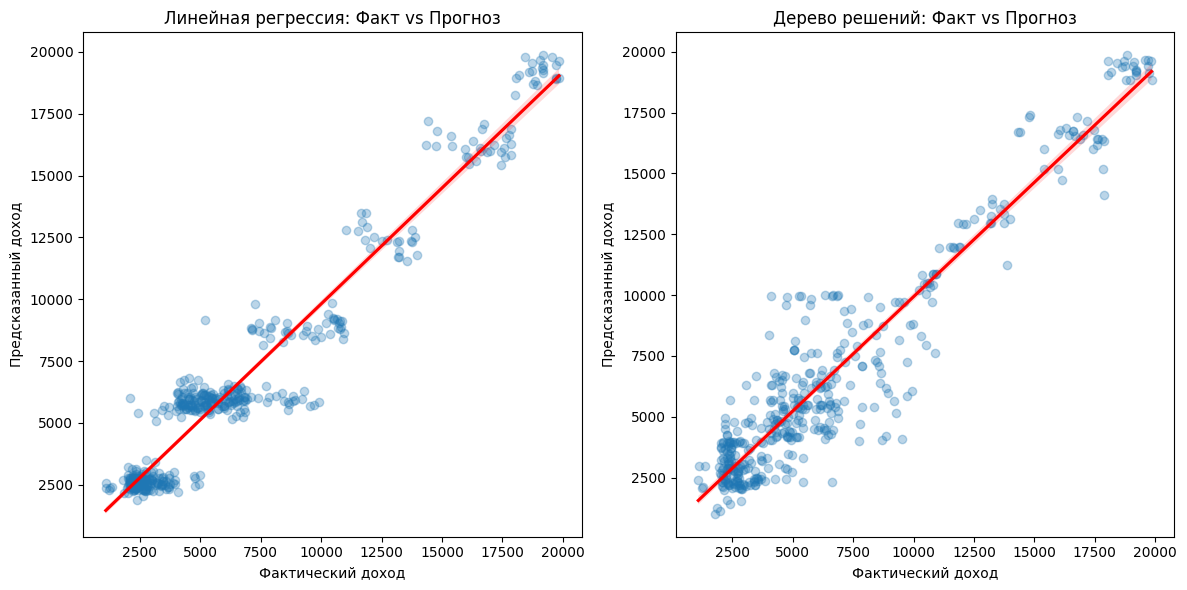

In [9]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=linear_pred, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
plt.title('Линейная регрессия: Факт vs Прогноз')
plt.xlabel('Фактический доход')
plt.ylabel('Предсказанный доход')

plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=tree_pred, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
plt.title('Дерево решений: Факт vs Прогноз')
plt.xlabel('Фактический доход')
plt.ylabel('Предсказанный доход')

plt.tight_layout()
plt.show()

## 7. Сравнение результатов

In [10]:
# results
print("=== Отчёт по модели Stacking ===")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_stack):.4f}")
print(classification_report(y_test_class, y_pred_stack))

print("=== Отчёт по модели MLP ===")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_mlp):.4f}")
print(classification_report(y_test_class, y_pred_mlp))

print("=== Отчёт по модели COMBI ===")
print(f"MSE: {linear_mse:.4f}")
print(f"R²: {r2_score(y_test, linear_pred):.4f}")

print("=== Отчёт по модели MIA ===")
print(f"MSE: {tree_mse:.4f}")
print(f"R²: {r2_score(y_test, tree_pred):.4f}")

=== Отчёт по модели Stacking ===
Accuracy: 0.8949
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       248
           1       0.81      0.45      0.58        47

    accuracy                           0.89       295
   macro avg       0.86      0.71      0.76       295
weighted avg       0.89      0.89      0.88       295

=== Отчёт по модели MLP ===
Accuracy: 0.8915
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       248
           1       0.71      0.53      0.61        47

    accuracy                           0.89       295
   macro avg       0.81      0.75      0.77       295
weighted avg       0.88      0.89      0.88       295

=== Отчёт по модели COMBI ===
MSE: 1403538.7835
R²: 0.9399
=== Отчёт по модели MIA ===
MSE: 2319068.3258
R²: 0.9006
